In [1]:
## Accordingly we import few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importing Dataset
cens = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [10]:
cens

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
cens.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
cens.shape

(32560, 15)

In [14]:
#There are object data type columns in the data set.

inc.select_dtypes(exclude=np.number).columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [15]:
cens.select_dtypes(include=np.number).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [16]:
# Checking for null values, if any

cens.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No Null values.

In [17]:
# Checking for class imbalance

cens['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [18]:
cens['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

# Visualization

<AxesSubplot:xlabel='Workclass', ylabel='count'>

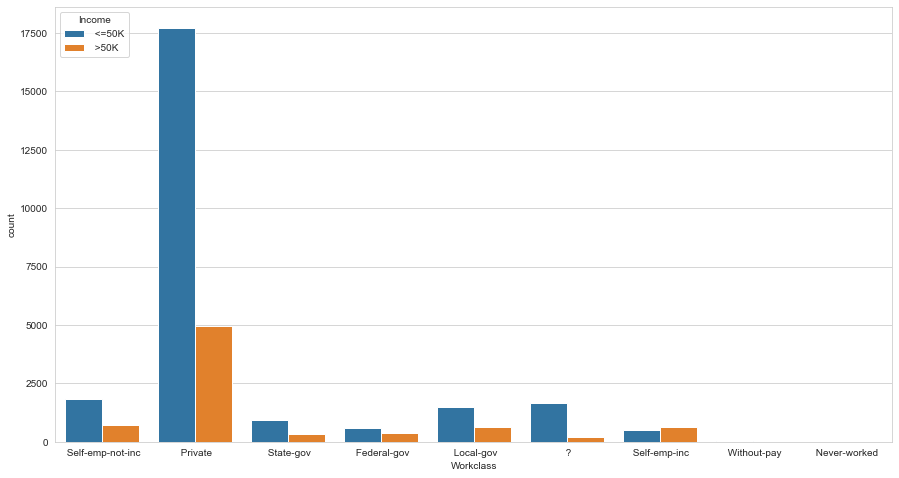

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(cens['Workclass'], hue=cens['Income'])

There is a more ratio of 'Private' workclass people comparatively.

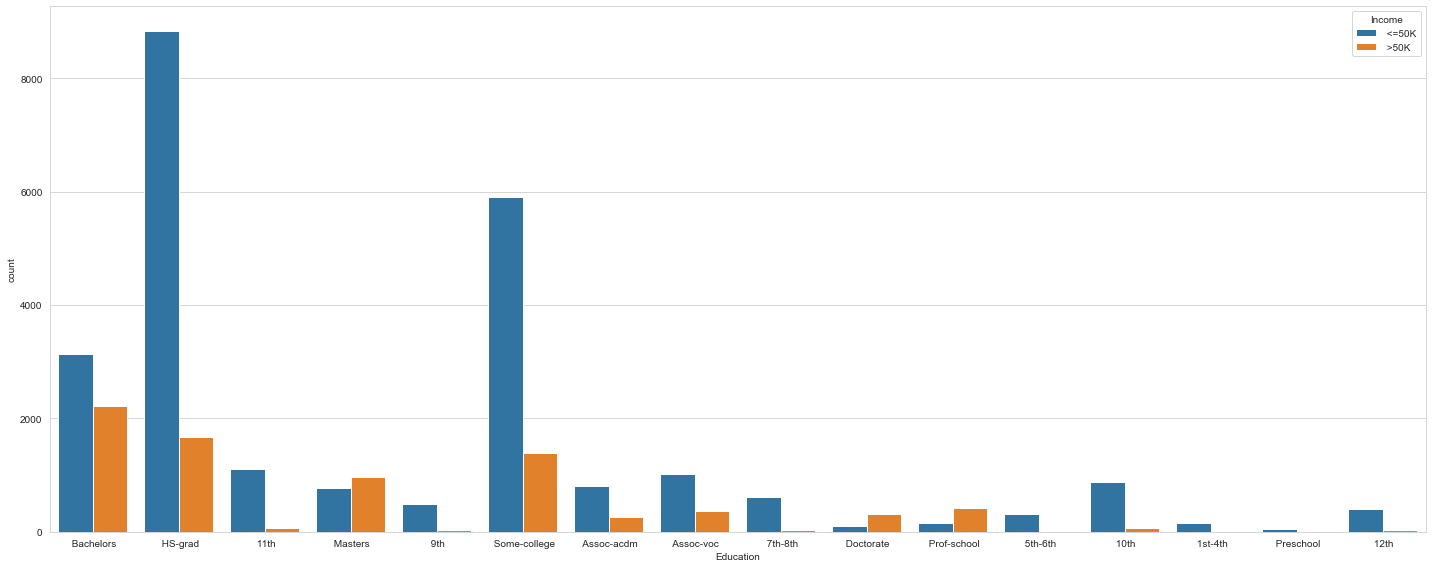

In [21]:
plt.figure(figsize=(20,8))
ax = sns.countplot(cens['Education'], hue=cens['Income'])


plt.tight_layout()
plt.show()

Education with 'H5-grad', 'Some-college' seem to be earning more comparatively.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

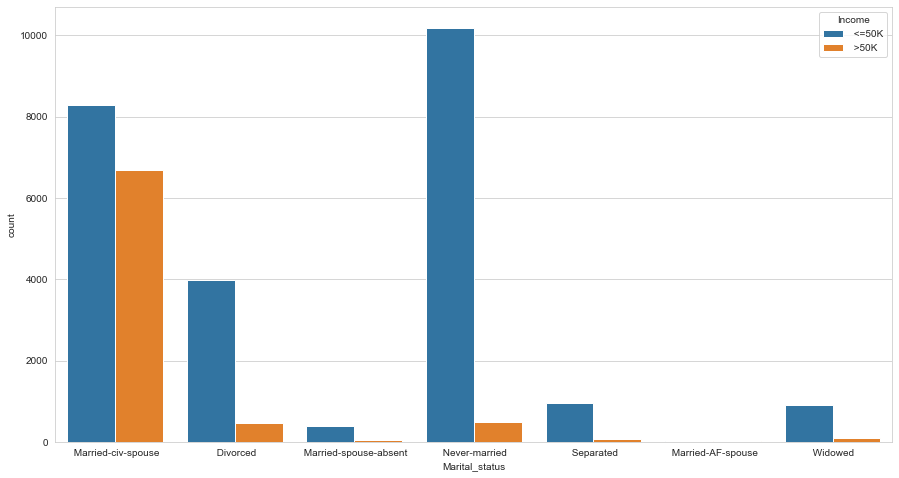

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(cens['Marital_status'], hue=cens['Income'])

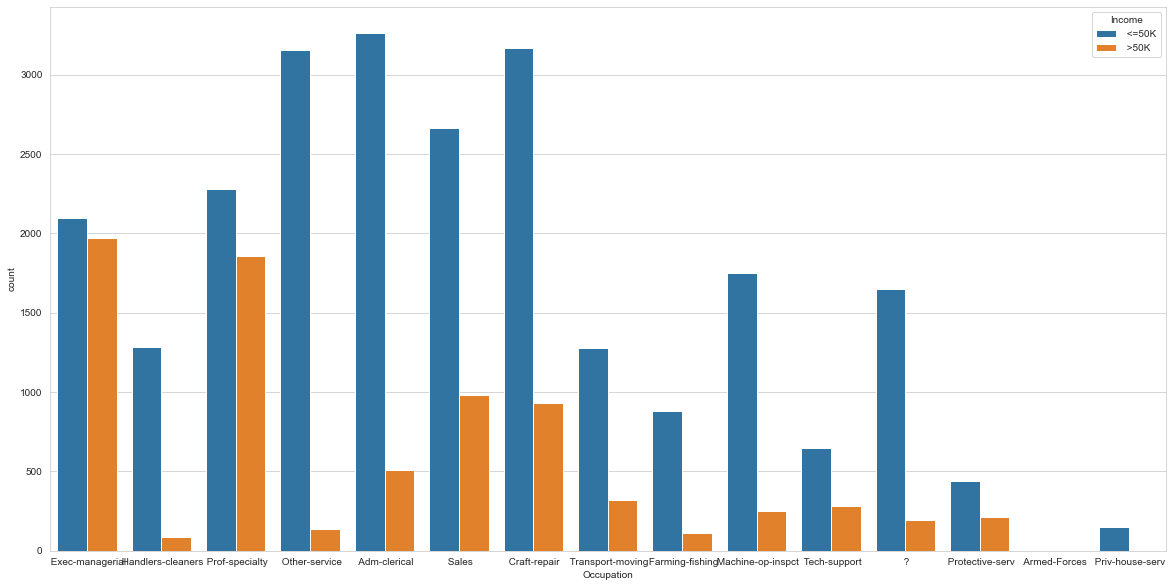

In [24]:
plt.figure(figsize=(20,10))
ax = sns.countplot(cens['Occupation'], hue=cens['Income'])
plt.show()

<AxesSubplot:xlabel='Relationship', ylabel='count'>

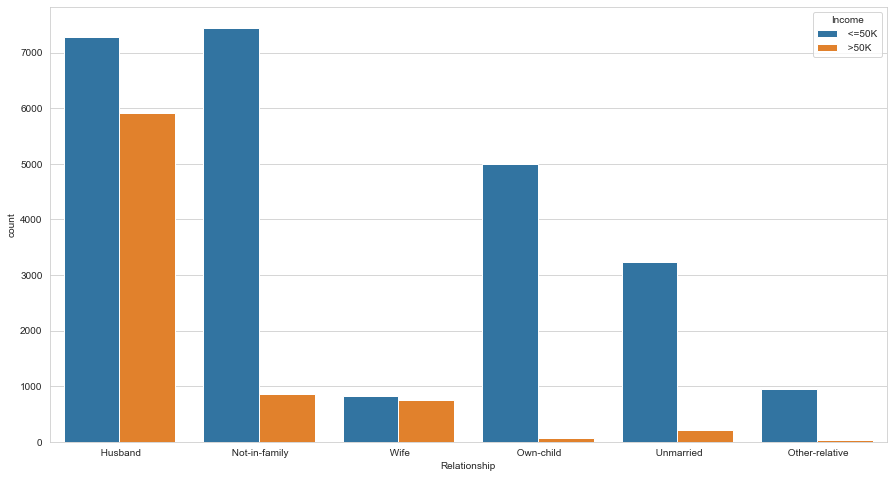

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(cens['Relationship'], hue=cens['Income'])

<AxesSubplot:xlabel='Race', ylabel='count'>

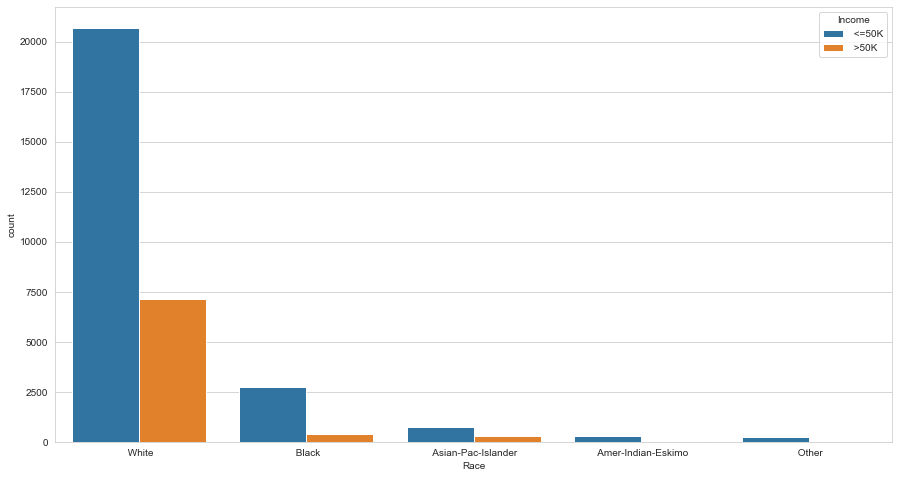

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(cens['Race'], hue=cens['Income'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

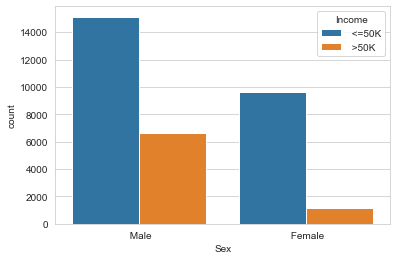

In [27]:
sns.countplot(cens['Sex'], hue=cens['Income'])

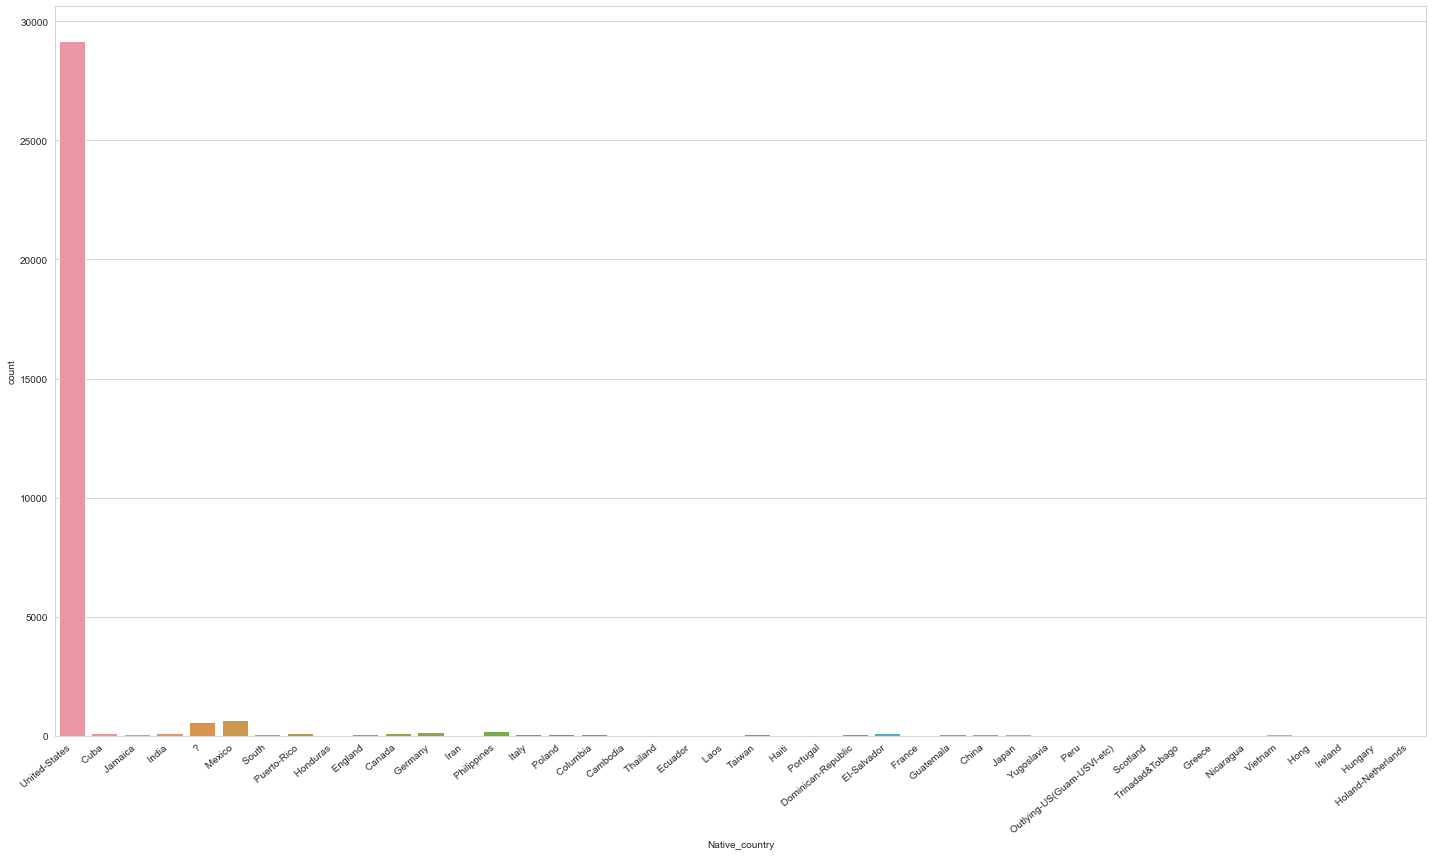

In [29]:
plt.figure(figsize=(20,12))
ax = sns.countplot(cens['Native_country']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.show()

In [30]:
#col = cens[['Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'hours.per.week']]

col = cens.copy

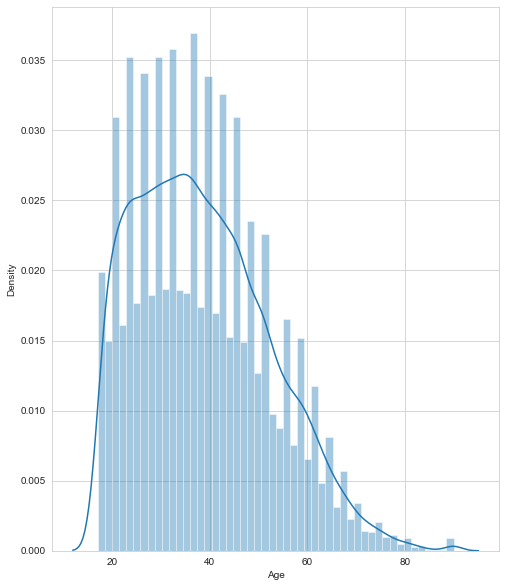

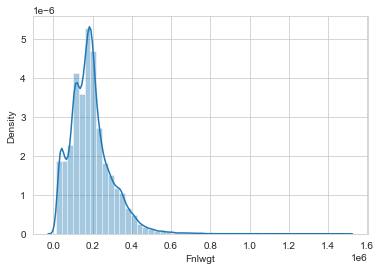

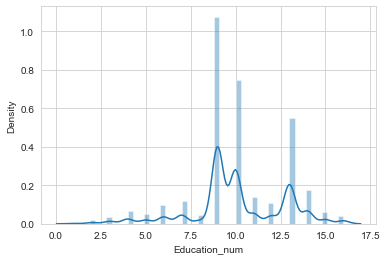

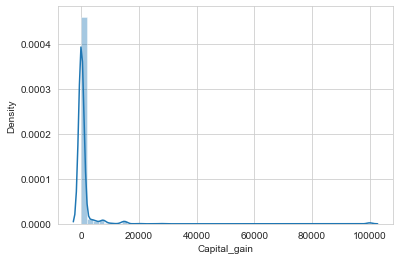

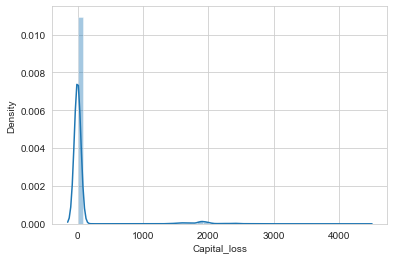

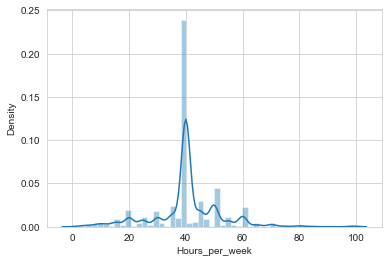

In [32]:
col = cens[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]

col1 = col.columns.values

plt.figure(figsize = (8,10))
for i in range (0, len(col1)):
    sns.distplot(cens[col1[i]])
    plt.show()

<AxesSubplot:>

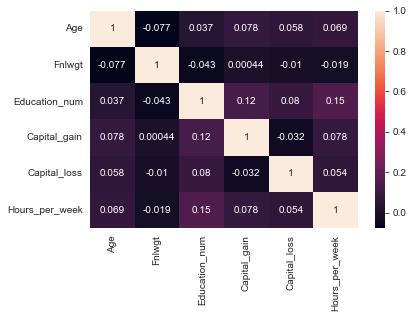

In [34]:
# Checking correlation

sns.heatmap(cens.corr(), annot=True)

 work in the data

In [35]:
for col in inc.columns:
    print(col,':', cens[cens[col] == ' ?'][col].count())

Age : 0
Workclass : 1836
Fnlwgt : 0
Education : 0
Education_num : 0
Marital_status : 0
Occupation : 1843
Relationship : 0
Race : 0
Sex : 0
Capital_gain : 0
Capital_loss : 0
Hours_per_week : 0
Native_country : 583
Income : 0


Instead of dropping the rows with seemingly missing values '?', I'll just rename it to 'Unknown', that way, if there is unseen data which the model sees with '?', it can help predict with better accuracy.

In [37]:
for cols in cens.select_dtypes(exclude=np.number).columns:
    cens[cols] = cens[cols].str.replace('?', 'Unknown')

In [38]:
# Unique values in each categorical feature

for cols in cens.select_dtypes(exclude=np.number).columns:
    print(cols, ':', cens[cols].unique(), end='\n\n')

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Unknown' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Marital_status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Unknown' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']

Relationship : [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

Sex : [' Male' ' Female']

Native_country : [' United-S

In [39]:
# Checking for correlation between columns 'education' and 'education-num'

pd.crosstab(cens['Education_num'],cens['Education'])

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Education_num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0
2,0,0,0,168,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,333,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,646,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,514,0,0,0,0,0,0,0,0,0
6,933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1175,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,433,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,10501,0,0,0,0


We can clearly see that categorical feature 'education' can perfectly be described numeric feature 'education.num'. Hence, we can drop one column.

Majority of the values in native.country seem to be USA. Let's find out percentage

In [40]:
cens['Native_country'].value_counts(normalize=True)*100

 United-States                 89.585381
 Mexico                         1.974816
 Unknown                        1.790541
 Philippines                    0.608108
 Germany                        0.420762
 Canada                         0.371622
 Puerto-Rico                    0.350123
 El-Salvador                    0.325553
 India                          0.307125
 Cuba                           0.291769
 England                        0.276413
 Jamaica                        0.248771
 South                          0.245700
 China                          0.230344
 Italy                          0.224201
 Dominican-Republic             0.214988
 Vietnam                        0.205774
 Guatemala                      0.196560
 Japan                          0.190418
 Poland                         0.184275
 Columbia                       0.181204
 Taiwan                         0.156634
 Haiti                          0.135135
 Iran                           0.132064
 Portugal       

In [41]:
cens.drop(['Fnlwgt', 'Capital_gain', 'Capital_loss', 'Native_country', 'Education'], axis=1, inplace=True)

In [42]:
# Dropping rows with Hours_per_week = 99

cens.drop(cens[cens['Hours_per_week'] == 99].index, inplace=True)


In [43]:
# Converting values in target column to numbers
#inc['Income'] = inc['Income'].map({'<=50K':0, '>50K':1})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cens['Income'] = le.fit_transform(cens['Income'])

In [44]:
# Encoding categorical features

categorical_columns = cens.select_dtypes(exclude=np.number).columns
new_df = pd.get_dummies(data=cens, prefix=categorical_columns, drop_first=True)

In [45]:
new_df.shape

(32475, 42)

In [47]:
new_df.head()

,Age,Education_num,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male
0,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,38,9,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,28,13,40,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,37,14,40,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
new_df['Income'].unique()

array([0, 1])

# Modelling

In [49]:
X = new_df.drop('Income', axis=1)
y = new_df['Income']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
# Hyperparameter tuning of Logistic Regression

param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'solver':['lbfgs', 'liblinear'], 'l1_ratio':[0.001, 0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, verbose=3)
grid.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.759 total time=   0.1s
[CV 2/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.757 total time=   0.1s
[CV 3/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.758 total time=   0.1s
[CV 4/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.758 total time=   0.1s
[CV 5/5] END C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear;

[CV 5/5] END C=0.001, l1_ratio=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.823 total time=   0.4s
[CV 2/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.827 total time=   0.4s
[CV 3/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.824 total time=   0.5s
[CV 4/5] END C=0.01, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.831 total time=   0.5s
[CV 5/5] END C=0.01, l1_ratio=0.001

[CV 1/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   1.5s
[CV 2/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.828 total time=   1.4s
[CV 3/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.832 total time=   1.2s
[CV 4/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.844 total time=   1.5s
[CV 5/5] END C=0.1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.836 total time=   1.1s
[CV 1/5] END C=0.1, l1_ratio=0.001, penalty=l2, so

[CV 1/5] END C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   2.4s
[CV 2/5] END C=1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.827 total time=   2.4s
[CV 3/5] END C=1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   2.3s
[CV 4/5] END C=1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.844 total time=   2.4s
[CV 5/5] END C=1, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.836 total time=   2.4s
[CV 1/5] END C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs;, score=0.8

[CV 1/5] END C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   2.2s
[CV 2/5] END C=10, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.827 total time=   3.0s
[CV 3/5] END C=10, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   2.9s
[CV 4/5] END C=10, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.843 total time=   2.5s
[CV 5/5] END C=10, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.836 total time=   2.2s
[CV 1/5] END C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs;

[CV 1/5] END C=100, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, l1_ratio=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   1.8s
[CV 2/5] END C=100, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.827 total time=   3.8s
[CV 3/5] END C=100, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.834 total time=   2.6s
[CV 4/5] END C=100, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.843 total time=   2.7s
[CV 5/5] END C=100, l1_ratio=0.001, penalty=l1, solver=liblinear;, score=0.837 total time=   2.5s
[CV 1/5] END C=100, l1_ratio=0.001, penalty=l2, so

[CV 3/5] END C=100, l1_ratio=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, l1_ratio=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, l1_ratio=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.001, 0.01, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=3)

In [52]:
grid.best_params_

{'C': 1, 'l1_ratio': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
grid.best_score_

0.835504234026174

In [54]:
log_reg = LogisticRegression(C=1, l1_ratio=0.001, solver='lbfgs', penalty='l2')

In [55]:
# Hyperparameter tuning of Random Forest
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 5, 7, 9, 10], 'n_estimators':[100, 200, 300, 400, 500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=3)
grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.759 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.759 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.759 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.759 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=100;, score=0.759 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=200;, score=0.759 total time=   2.4s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=200;, score=0.759 total time=   2.5s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=200;, score=0.759 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=200;, score=0.759 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=200;, score=0.759 total time=   2.6s
[CV 1/5] END crite

[CV 5/5] END criterion=gini, max_depth=7, n_estimators=300;, score=0.829 total time=   6.1s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=400;, score=0.823 total time=   8.0s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=400;, score=0.827 total time=   8.2s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=400;, score=0.831 total time=   8.1s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=400;, score=0.833 total time=   8.1s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=400;, score=0.830 total time=   8.0s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.824 total time=  10.1s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.828 total time=  10.2s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.830 total time=  10.2s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.832 total time=  10.2s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.830 total t

[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.819 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.818 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.817 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.814 total time=   2.8s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.818 total time=   2.8s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.819 total time=   2.8s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.820 total time=   2.9s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.819 total time=   2.8s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.813 total time=   4.3s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.817 total time=   4.3s
[CV 3/5] END criterion=entropy, max_depth=4, n_est

[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.834 total time=   7.2s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=400;, score=0.828 total time=   9.8s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=400;, score=0.829 total time=   9.7s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=400;, score=0.835 total time=   9.6s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=400;, score=0.836 total time=   9.6s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=400;, score=0.834 total time=   9.9s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=500;, score=0.828 total time=  12.4s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=500;, score=0.829 total time=  12.2s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=500;, score=0.832 total time=  12.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=500;, score=0.836 total time=  12.1s
[CV 5/5] END criterion=entropy, max_depth=9, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 7, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [57]:
grid.best_score_

0.8354118552732871

In [58]:
rfc = RandomForestClassifier()
classifiers = [log_reg, rfc]

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)

scores_dict = {}

for train_index, valid_index in folds.split(X_train, y_train):
    # Need to use iloc as it provides integer-location based indexing, regardless of index values.
    X_train_fold, X_valid_fold = X.iloc[train_index], X.iloc[valid_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[valid_index]
    
    for classifier in classifiers:
        name = classifier.__class__.__name__
        classifier.fit(X_train_fold, y_train_fold)
        training_predictions = classifier.predict_proba(X_valid_fold)
        # roc_auc_score should be calculated on probabilities, hence using predict_proba
        
        scores = roc_auc_score(y_valid_fold, training_predictions[:, 1])
        if name in scores_dict:
            scores_dict[name] += scores
        else:
            scores_dict[name] = scores

# Taking average of the scores
for classifier in scores_dict:
    scores_dict[classifier] = scores_dict[classifier]/folds.n_splits

In [59]:
scores_dict

{'LogisticRegression': 0.8827478637066156,
 'RandomForestClassifier': 0.8581232568213535}

The best model is 'LogisticRegression' as it has the better score of 0.88 which means it predict 88% of the data correct.